In [2]:
# Feature Importance
# https://en.wikipedia.org/wiki/Feature_extraction

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [4]:
diabetes = load_diabetes()

In [5]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [7]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [8]:
 X_train, X_val, y_train, y_val = train_test_split(diabetes.data, diabetes.target, random_state=0)

In [10]:
model = Ridge(alpha=1e-2).fit(X_train, y_train)

In [11]:
model.score(X_val, y_val)

0.3566675322939422

In [12]:
from sklearn.inspection import permutation_importance

In [13]:
r = permutation_importance(model, X_val, y_val,n_repeats=30,random_state=0)

In [14]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{diabetes.feature_names[i]:<8} {r.importances_mean[i]:.3f} +/- {r.importances_std[i]:.3f}")

s5       0.204 +/- 0.050
bmi      0.176 +/- 0.048
bp       0.088 +/- 0.033
sex      0.056 +/- 0.023


In [15]:
# SHAP
# https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

In [17]:
# !pip install shap
import shap

C:\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
X = X_train.copy()
y = y_train.copy()

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [24]:
from sklearn.linear_model import LinearRegression
# train the linear model
model = LinearRegression().fit(X_std, y)

In [25]:
# explain the model's predictions using SHAP
explainer = shap.explainers.Linear(model, X_std)
shap_values = explainer(X_std)

In [30]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

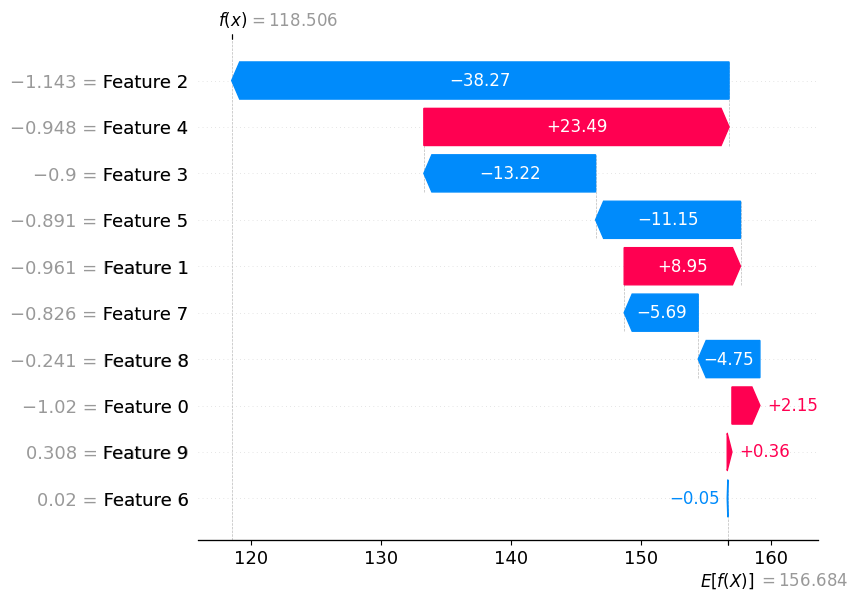

In [34]:
shap.plots.waterfall(shap_values[0])